<a href="https://colab.research.google.com/github/regain001/Interview-Preparation/blob/master/sliding_window.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**11. Container With Most Water**


---


You are given an integer array height of length n. There are n vertical lines drawn such that the two endpoints of the ith line are (i, 0) and (i, height[i]).

Find two lines that together with the x-axis form a container, such that the container contains the most water.

Return the maximum amount of water a container can store.

Notice that you may not slant the container.

 
```
Example 1:
Input: height = [1,8,6,2,5,4,8,3,7]
Output: 49
Explanation: The above vertical lines are represented by array [1,8,6,2,5,4,8,3,7]. In this case, the max area of water (blue section) the container can contain is 49.
```

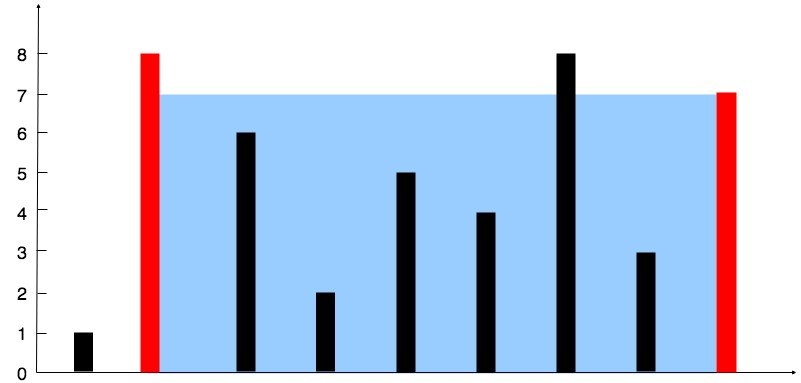

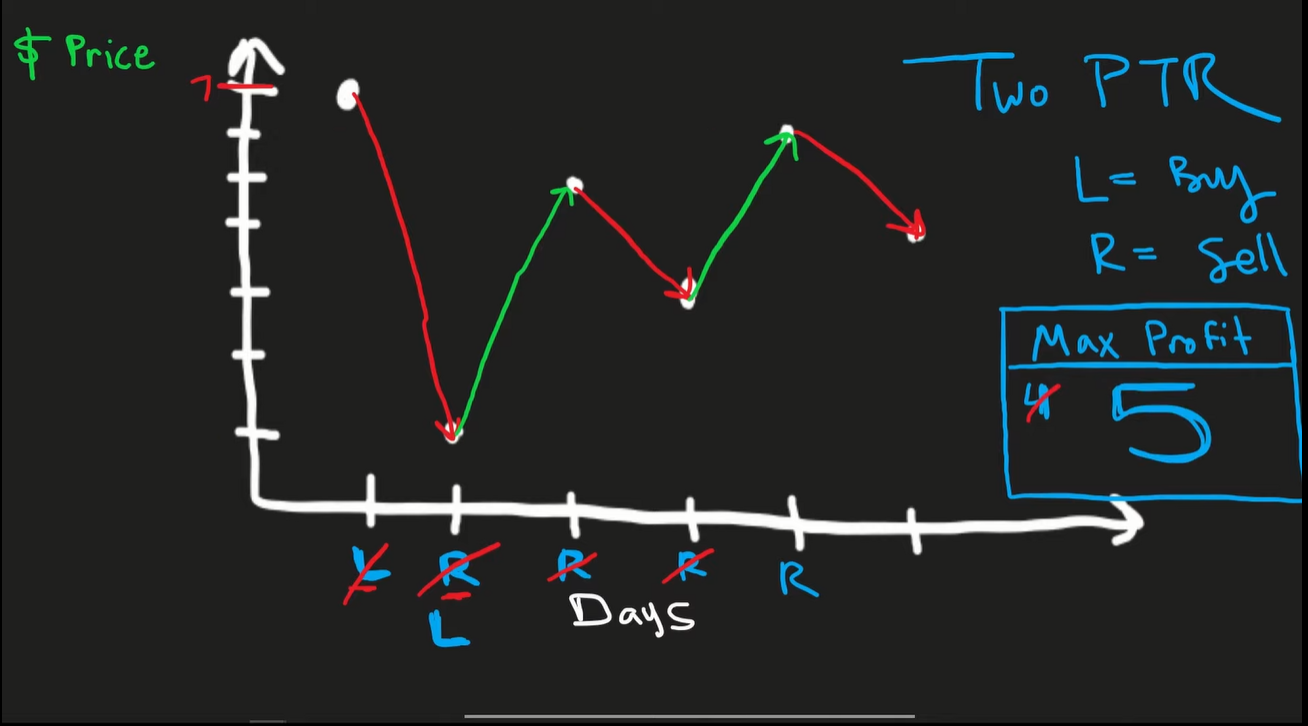

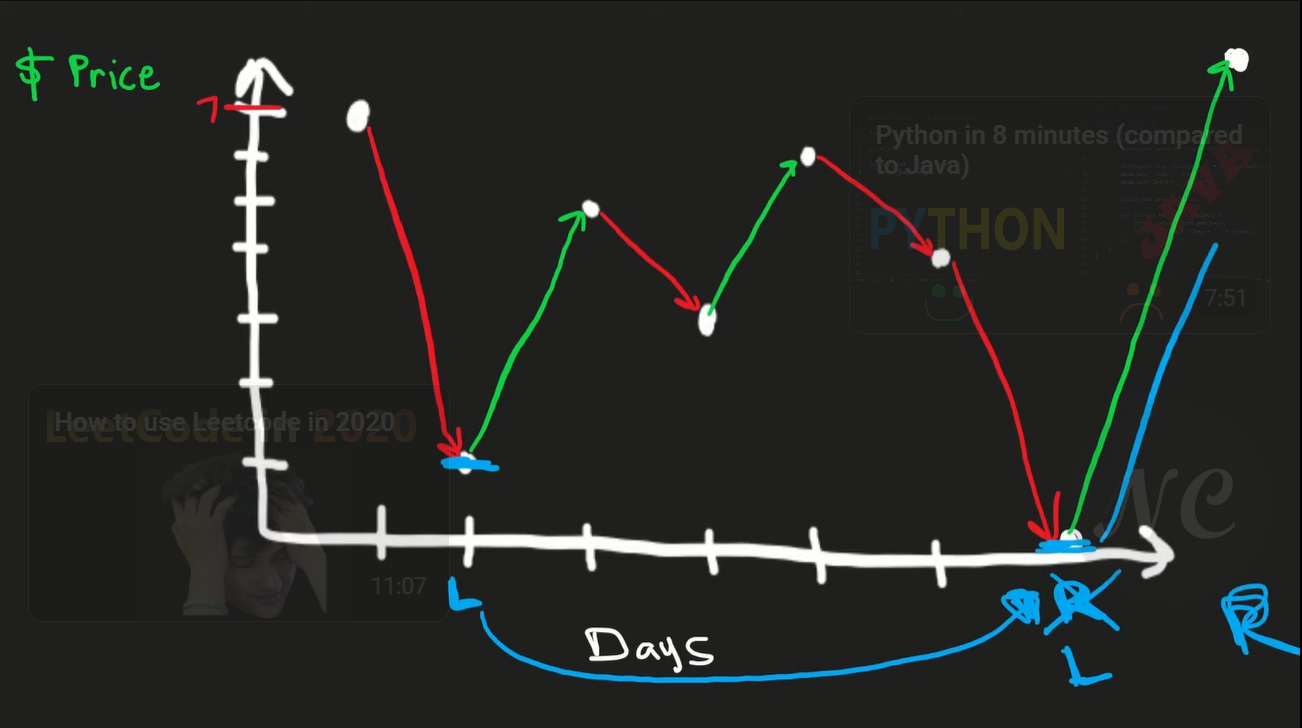

In [ ]:
## Time complexity : O(n^2)
## Space complexity : O(1)
## Study link: https://www.youtube.com/watch?v=1pkOgXD63yU

# Brute force solution
def maxProfit(prices):
    maxProfit = 0
    for i in range(len(prices)):
        for j in range(i + 1, len(prices), 1):
            curProfit = prices[j] - prices[i]
            maxProfit = max(maxProfit, curProfit)
    return maxProfit


## Time complexity : O(n)
## Space complexity : O(1)
# Two pointer
def maxProfitOptimal(prices):
    l, r = 0, 1 # left=Buy, right=sell
    maxProfit = 0
    while r < len(prices):
        # if profitable ?
        if prices[r] > prices[l]:
            curProfit = prices[r] - prices[l]
            maxProfit = max(maxProfit, curProfit)
        else:
            l = r
        r += 1

    return maxProfit



def main():
    print('maxProfit :', maxProfit([7,1,5,3,6,4]))
    print('-----------------')
    print('maxProfitOptimal :', maxProfitOptimal([7,1,5,3,6,4]))



if __name__ == "__main__":
    main()

maxProfit : 5
-----------------
maxProfitOptimal : 5


**3. Longest Substring Without Repeating Characters**


---

Given a string s, find the length of the longest substring without repeating characters.

```
Example 1:

Input: s = "abcabcbb"
Output: 3
Explanation: The answer is "abc", with the length of 3.

Example 2:

Input: s = "bbbbb"
Output: 1
Explanation: The answer is "b", with the length of 1.

Example 3:

Input: s = "pwwkew"
Output: 3
Explanation: The answer is "wke", with the length of 3.
Notice that the answer must be a substring, "pwke" is a subsequence and not a substring.
 

Constraints:

0 <= s.length <= 5 * 104
s consists of English letters, digits, symbols and spaces.
```


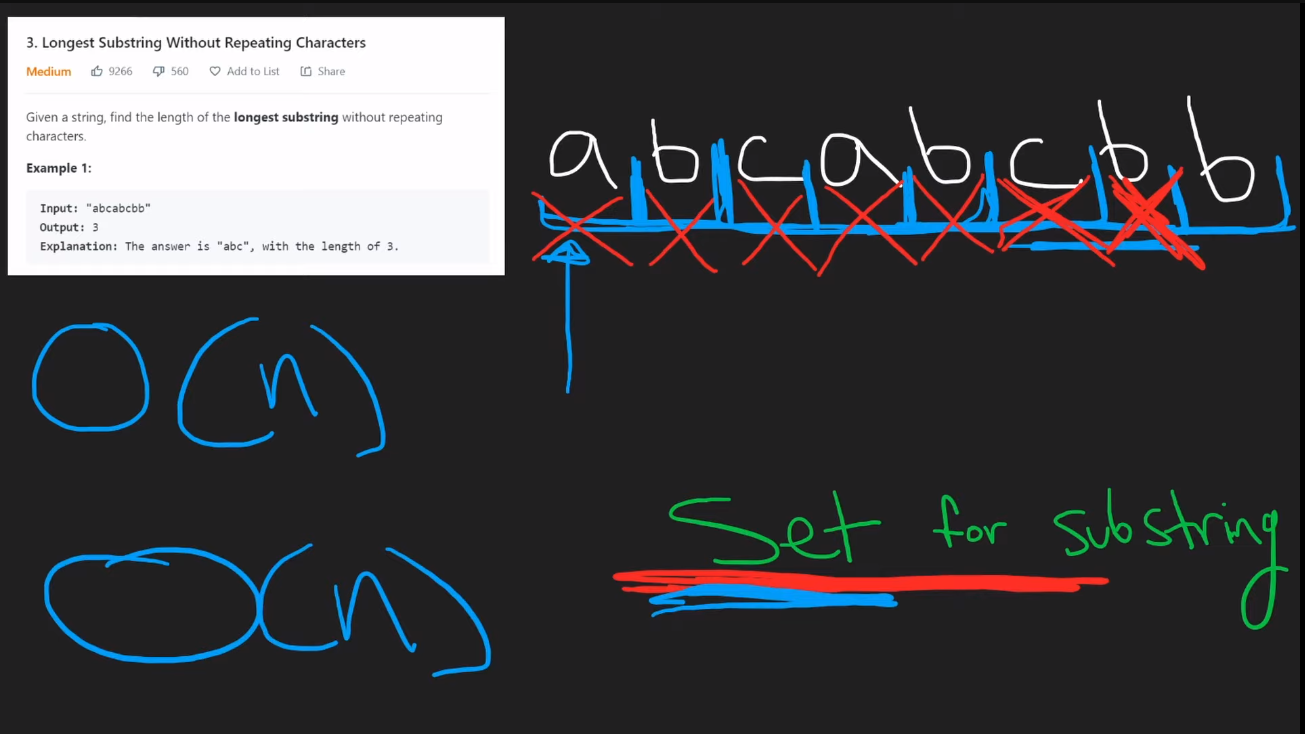

In [ ]:
## Time complexity : O(n)
## Space complexity : O(n)
## Study link: https://www.youtube.com/watch?v=wiGpQwVHdE0

# Two pointer/Sliding windows
def lengthOfLongestSubstring(s):
    charSet = set()
    res = 0
    l = 0
    for r in range(len(s)):
        while s[r] in charSet:
            charSet.remove(s[l])
            l += 1
        charSet.add(s[r])
        res = max(res, r - l + 1)

    return res


def main():
    print('lengthOfLongestSubstring :', lengthOfLongestSubstring("abcabcbb"))
    print('-----------------')
    print('lengthOfLongestSubstring :', lengthOfLongestSubstring("pwwkew"))



if __name__ == "__main__":
    main()

lengthOfLongestSubstring : 3
-----------------
lengthOfLongestSubstring : 3


**424. Longest Repeating Character Replacement**


---
You are given a string s and an integer k. You can choose any character of the string and change it to any other uppercase English character. You can perform this operation at most k times.

Return the length of the longest substring containing the same letter you can get after performing the above operations.

```
Example 1:

Input: s = "ABAB", k = 2
Output: 4
Explanation: Replace the two 'A's with two 'B's or vice versa.

Example 2:

Input: s = "AABABBA", k = 1
Output: 4
Explanation: Replace the one 'A' in the middle with 'B' and form "AABBBBA".
The substring "BBBB" has the longest repeating letters, which is 4.
 

Constraints:

1 <= s.length <= 105
s consists of only uppercase English letters.

```

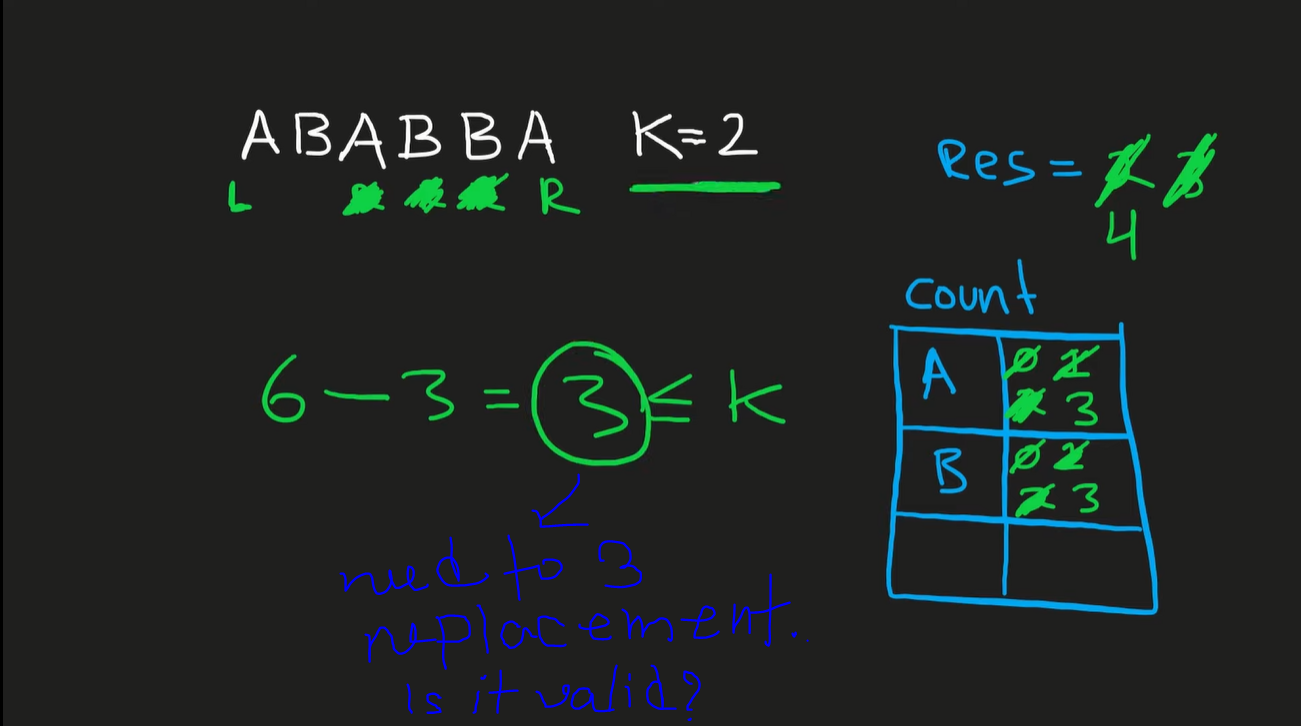

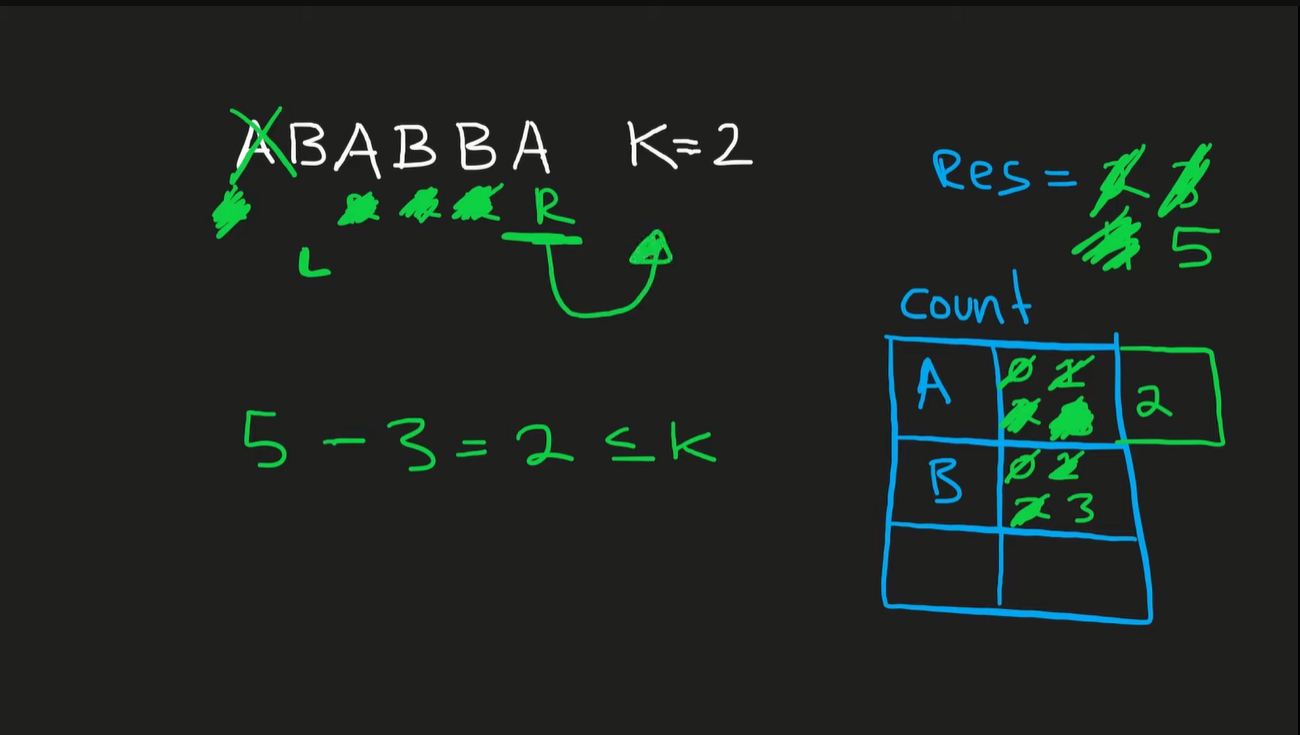

**For Optimal Solution**



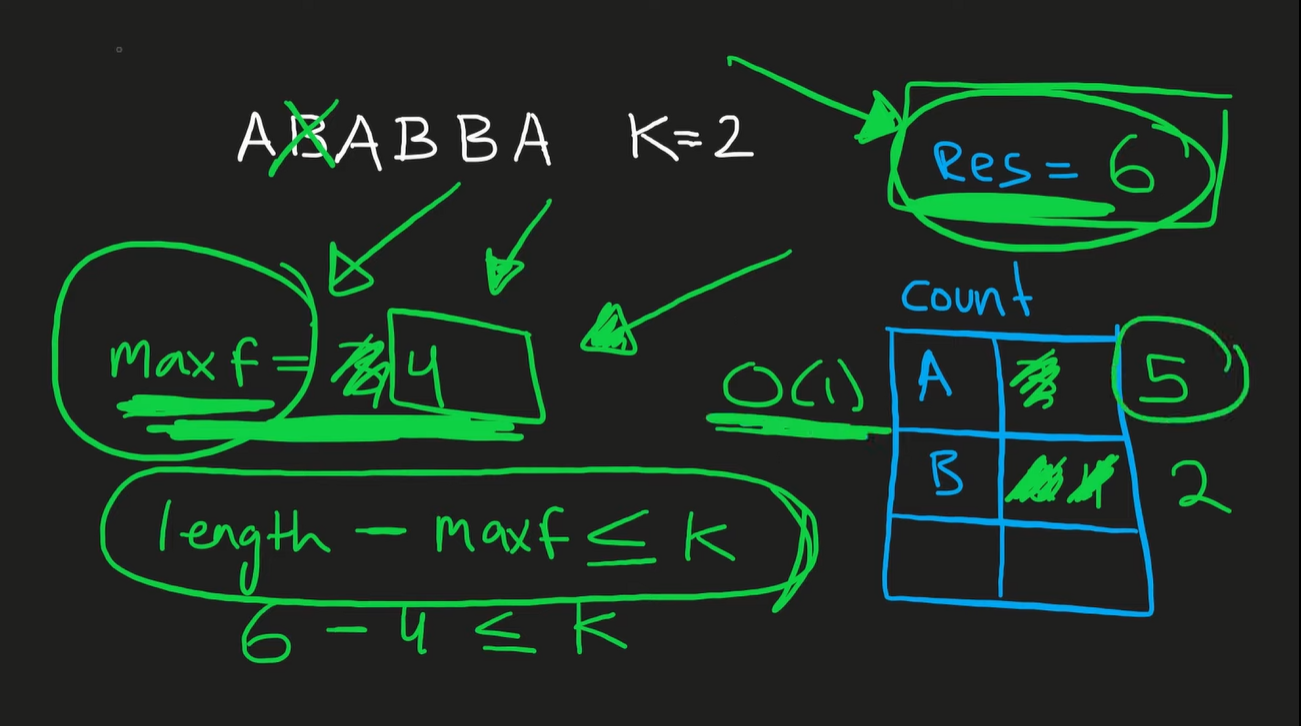

In [ ]:
## Time complexity : O(26n)
## Space complexity : O(26)
## Study link: https://www.youtube.com/watch?v=gqXU1UyA8pk&t=16s

# Sliding windows
def characterReplacement(s, k):
    count = {}
    res = 0
    l = 0

    for r in range(len(s)):
        count[s[r]] = count.get(s[r], 0) + 1

        # While (current sliding window) - max frequency of a char > k times
        while (r - l + 1) - max(count.values()) > k: # O( 26 ), at most because A to Z = 26 chars
            count[s[l]] -= 1
            l += 1

        # Because it is a valid sliding window
        res = max(res, r - l + 1)

    return res


## Time complexity : O(n)
## Space complexity : O(26)
def characterReplacementOptimal(s, k):
    count = {}
    res = 0
    l = 0
    maxFreuency = 0

    for r in range(len(s)):
        count[s[r]] = count.get(s[r], 0) + 1

        # Because count[s[r]], this char may be become the most frequent character
        maxFreuency = max(maxFreuency, count[s[r]])

        
        # We don't need to look up entire HashMap to find Max Frequency,
        # Which requires only O(1) time to look up.
        # While (current sliding window) - max frequency of a char > k times
        while (r - l + 1) - maxFreuency > k:
            count[s[l]] -= 1
            l += 1

        # Because it is a valid sliding window
        res = max(res, r - l + 1)

    return res


def main():
    print('characterReplacement :', characterReplacement("AABABBA", 2))
    print('-----------------')
    print('characterReplacement :', characterReplacement("ABAB", 2))
    print('-----------------')
    print('characterReplacementOptimal :', characterReplacementOptimal("AABABBA", 2))



if __name__ == "__main__":
    main()

characterReplacement : 5
-----------------
characterReplacement : 4
-----------------
characterReplacementOptimal : 5


**76. Minimum Window Substring**


---
Given two strings s and t of lengths m and n respectively, return the minimum window substring of s such that every character in t (including duplicates) is included in the window. If there is no such substring, return the empty string "".

The testcases will be generated such that the answer is unique.
```
Example 1:

Input: s = "ADOBECODEBANC", t = "ABC"
Output: "BANC"
Explanation: The minimum window substring "BANC" includes 'A', 'B', and 'C' from string t.

Example 2:

Input: s = "a", t = "a"
Output: "a"
Explanation: The entire string s is the minimum window.

Example 3:

Input: s = "a", t = "aa"
Output: ""
Explanation: Both 'a's from t must be included in the window.
Since the largest window of s only has one 'a', return empty string.
 

Constraints:

m == s.length
n == t.length
1 <= m, n <= 105
s and t consist of uppercase and lowercase English letters.
 

Follow up: Could you find an algorithm that runs in O(m + n) time?
```


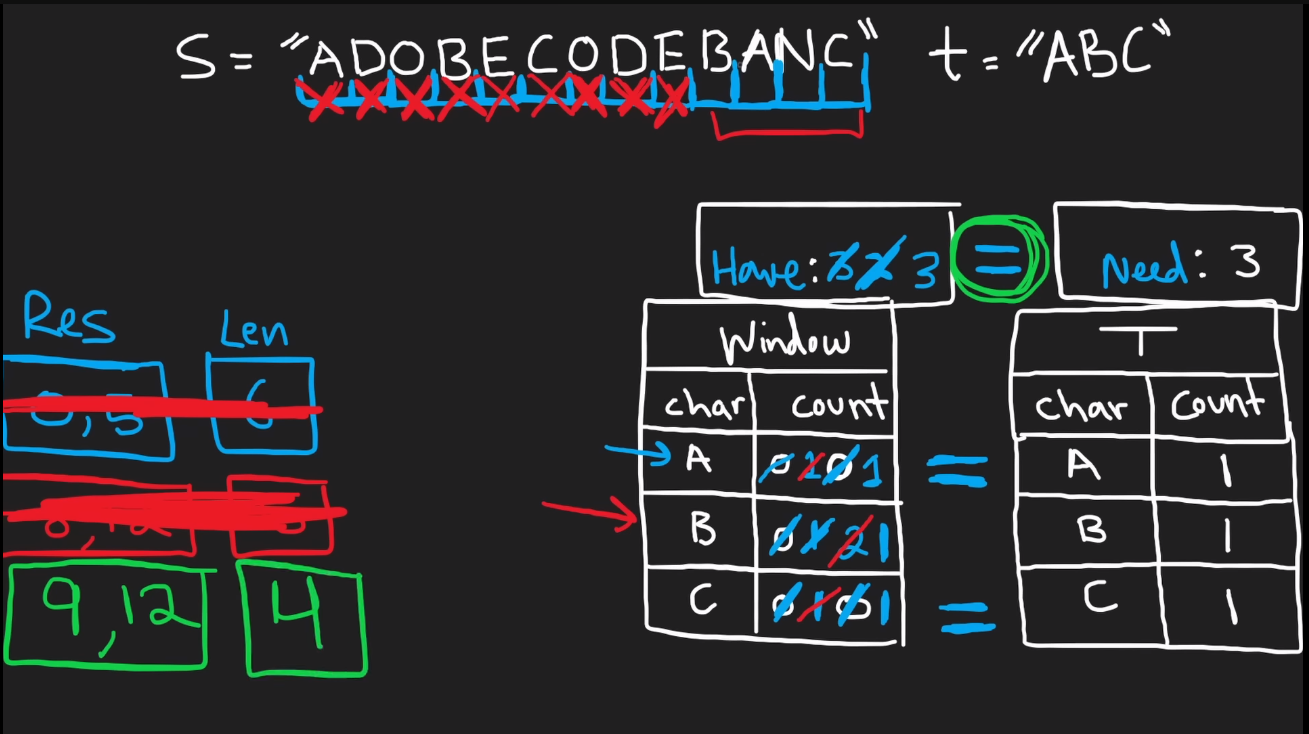

In [ ]:
## Time complexity : O(n)
## Space complexity : O(n)
## Study link: https://www.youtube.com/watch?v=jSto0O4AJbM&t=184s

# Sliding windows
def minWindow(s, t):
    if t == "": return ""

    window, countT  = {}, {}

    # t character count in a HashMap
    for c in t:
        countT[c] = countT.get(c, 0) + 1

    have, need = 0, len(countT) ## important!!
    res, resLen = [-1, -1], float("infinity")

    l = 0
    for r in range(len(s)):
        c = s[r]
        window[c] = window.get(c, 0) + 1

        if c in countT and window[c] == countT[c]:
            have += 1

        while have == need:
            # Update the result by minimum window substring
            if (r - l + 1) < resLen:
                res = [l, r]
                resLen = (r - l + 1)

            # Pop up from the left of our window
            window[s[l]] -= 1
            if s[l] in countT and window[s[l]] < countT[s[l]]:
                have -= 1
            l += 1

    l, r = res
    return s[l:r+1] if resLen != float("infinity") else ""


def main():
    print('minWindow :', minWindow("ADOBECODEBANC", "ABC"))
    print('-----------------')
    print('minWindow :', minWindow("aa", "aa"))
    print('-----------------')
    print('minWindow :', minWindow("a", "aa"))


if __name__ == "__main__":
    main()

minWindow : BANC
-----------------
minWindow : aa
-----------------
minWindow : 


**20. Valid Parentheses**


---



In [ ]:
## Time complexity : O(n)
## Space complexity : O(n)
## Study link: 

# 1. if it's the left bracket then we append it to the stack
# 2. else if it's the right bracket and the stack is empty(meaning no matching left bracket), or the left bracket doesn't match
# 3. finally check if the stack still contains unmatched left bracket

# Stack
def isValid(s):
    if len(s) % 2 != 0: return False

    brackets = {'(':')', '{':'}', '[':']'}
    stack = []
    for char in s:
        if char in brackets:
            stack.append(char)
        elif len(stack) == 0 or brackets[stack.pop()] != char:
            return False

    return len(stack) == 0


def main():
    print('minWindow :', isValid("()[]{}"))
    print('-----------------')
    print('minWindow :', isValid("()"))



if __name__ == "__main__":
    main()

minWindow : True
-----------------
minWindow : True
